# Wie können wir manuell einen Entscheidungsbaum entwickeln?

Wir haben zwei **Klassen** von Insekten: 
- "Marienkäfer"
- "Raupe" 


<td> 
    <img src="Bilder\marienkaefer.jpg" alt="Drawing" style="width: 100px; float: left;"  hspace=40 /> 
    <img src="Bilder\raupe.jpg" alt="Drawing" style="width: 100px; float: left;" hspace=40/>
</td>

In [1]:
# Dieser Quelltext ist nicht prüfungsrelevant.

# Bibliotheken importieren
import pandas as pd
from PyTree import ClassificationTree as ct
from plotly.offline import iplot
import plotly as py
import cufflinks as cf
cf.go_offline()

ModuleNotFoundError: No module named 'PyTree'

## Trainingsdaten vs. Testdaten
Das Modell wird nur mit den Trainingsdaten trainiert.

Mit Testdaten wird die Qualität des Modells überprüft.
Das erstellte Modell so möglichst gut die bisher unbekannten Testdaten klassifizieren.

In [10]:
# Trainingsdaten einlesen -> "data frame käfer trainingsdaten"
df_käfer_trainingsdaten = pd.read_csv('Käfer.csv', sep=';')

# Testdaten einlesen -> "data frame käfer testdaten"
df_käfer_testdaten = pd.read_csv('Käfer_Testdaten.csv', sep=';')


# zeige den Anfang des Datensatzes "df_käfer_trainingsdaten" an
print("Trainingsdaten")
display(df_käfer_trainingsdaten)

# zeige den Anfang des Datensatzes "df_käfer_testdaten" an
print("Testdaten")
display(df_käfer_testdaten)


Trainingsdaten


,Breite,Länge,Insekt
0,0.48,0.38,Marienkäfer
1,0.32,0.74,Raupe
2,0.49,0.27,Marienkäfer
3,0.58,0.46,Marienkäfer
4,0.11,0.58,Raupe
...,...,...,...
195,0.57,0.37,Marienkäfer
196,0.10,0.54,Raupe
197,0.39,0.81,Raupe
198,0.56,0.29,Marienkäfer


Testdaten


,Breite,Länge,Insekt
0,0.42,0.29,Marienkäfer
1,0.39,0.92,Raupe
2,0.39,0.32,Marienkäfer
3,0.53,0.44,Marienkäfer
4,0.68,0.53,Marienkäfer
...,...,...,...
195,0.51,0.35,Marienkäfer
196,0.19,0.70,Raupe
197,0.57,0.29,Marienkäfer
198,0.16,0.60,Raupe


In [11]:
# Entscheidungsbaum initialisieren mit Zielvariable (hier in Spalte "Insekt") und Trainingsdaten
tree = ct.DecisionTree(target = 'Insekt', data = df_käfer_trainingsdaten)

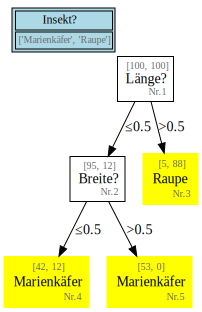

In [12]:
#Entscheidungsbaum erstellen 

# threshold bedeutet Schwellenwert
# Die Schwellenwerte wurden hier willkürlich gewählt und sollen später angepasst werden.

tree.manual_split(attribute = 'Länge',  threshold = 0.5, node_nr = 1) # hier threshold anpassen
tree.manual_split(attribute = 'Breite', threshold = 0.5, node_nr = 2) # hier threshold anpassen


#Entscheidungsbaum ausgeben
tree.print_tree()

<div style="background-color: lightblue; padding: 5px 20px 20px">

**Aufgabe 1**
    
1.1. *Erläutere, wie viele Insekte im obigen Beispiel mit den Schwellenwerten von jeweils 0.5 falsch klassifiziert werden.*
    
    Tipp: Die Zahlen in den eckigen Klammern (hier: z. B. [42,12]) sind von Bedeutung.
    
1.2. *Verändere im vorherigen Quelltext die Schwellenwerte (thresholds) so, dass die Anzahl der Fehlklassifikationen minimal wird. Notiere die beste Wahl der gefundenen Schwellenwerte.*
    
    
**Vertiefungsaufgabe 2**
  
2.1. *Entferne die letzte Programmcodezeile "tree.manual_split(attribute ...)" und passe die Schwellenwerte erneut so an, dass die Anzahl der Fehlklassifikationen minimal wird.*

    
**Vertiefungsaufgabe 3**
  
3.1. *Führe den folgenden Quelltext aus, der die Qualität Deines Modells bewertet.*

3.2  *Interpretiere die Ausgabe.*

3.3. *Verändere im vorherigen Quelltext erneut die Schwellenwerte (thresholds) so, dass die Anzahl der Fehlklassifikationen minimal wird. Notiere die beste Wahl der gefundenen Schwellenwerte.*

## Das trainierte Modell des Entscheidungsbaumes an Testdaten evaluieren
Wir möchten ermitteln, wie "gut" unser Modell die Testdaten klassifiziert.

In [13]:
# Rate korrekter Klassifikationen
tree.prediction_accuracy(df_käfer_testdaten)

0.905

In [14]:
# Häufigkeitstabelle/ Confusion Matrix
tree.prediction_accuracy(df_käfer_testdaten, detailed = True)

prediction,Marienkäfer,Raupe
correct,,
Marienkäfer,91.0%,9.0%
Raupe,10.0%,90.0%


prediction,Marienkäfer,Raupe
correct,,
Marienkäfer,91,9
Raupe,10,90


<div style="background-color: lightblue; padding: 5px 20px 20px">

**Vertiefungsaufgabe 4**
  
4.1. *Erläutere die Strategie, mit der Du Deine Schwellenwerte bestimmt hast.*
